Installing Required Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Getting the dataset from UCI ML Repo

In [3]:
dataset = pd.read_csv("bank-additional-full.csv", sep=';', quotechar='"')

In [18]:
dataset.to_csv("proper_dataset.csv")

Understanding dataset and data types

In [4]:
dataset.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print(f"Number of columns: {dataset.shape[1]}")
print(f"Number of rows: {dataset.shape[0]}")

Number of columns: 21
Number of rows: 41188


In [6]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Handling Null Values

In [8]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Understanding values in each columns

In [9]:
print(f"Unique values in 'Job' column: {dataset['job'].unique()}")
print(f"Unique values in 'Marital Status' column: {dataset['marital'].unique()}")
print(f"Unique values in 'Education' column: {dataset['education'].unique()}")
print(f"Unique values in 'Default' column: {dataset['default'].unique()}")
print(f"Unique values in 'Housing' column: {dataset['housing'].unique()}")
print(f"Unique values in 'Loan' column: {dataset['loan'].unique()}")
print(f"Unique values in 'Contact' column: {dataset['contact'].unique()}")
print(f"Unique values in 'Month' column: {dataset['month'].unique()}")

Unique values in 'Job' column: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in 'Marital Status' column: ['married' 'single' 'divorced' 'unknown']
Unique values in 'Education' column: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values in 'Default' column: ['no' 'unknown' 'yes']
Unique values in 'Housing' column: ['no' 'yes' 'unknown']
Unique values in 'Loan' column: ['no' 'yes' 'unknown']
Unique values in 'Contact' column: ['telephone' 'cellular']
Unique values in 'Month' column: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [19]:
print(f"Unique values in 'pdays' column: {dataset['pdays'].unique()}")

Unique values in 'pdays' column: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


In [10]:
# Separate numerical and categorical columns
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

In [21]:
dataset[numeric_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


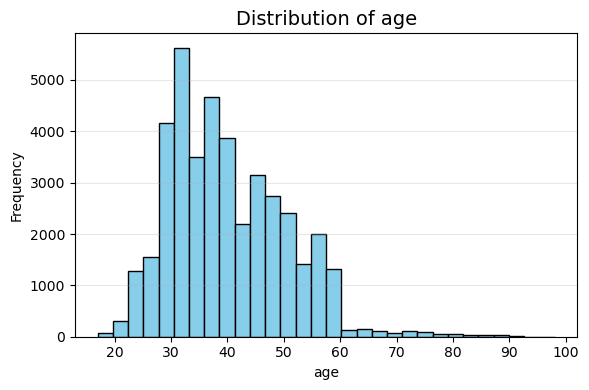

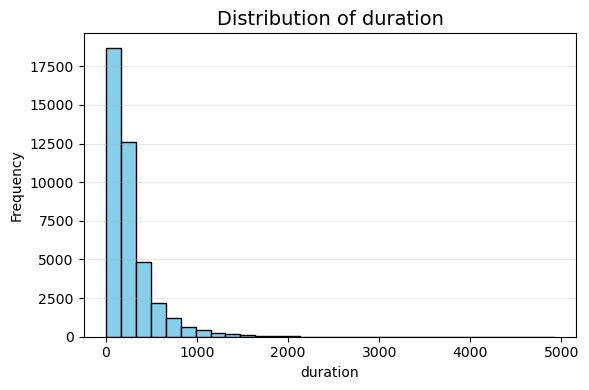

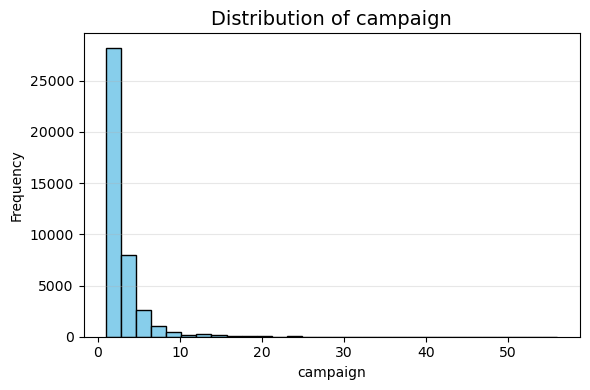

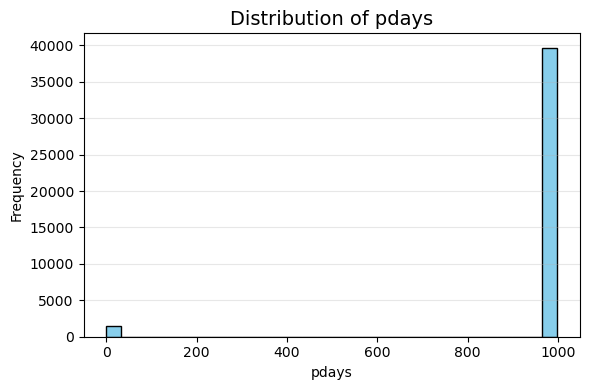

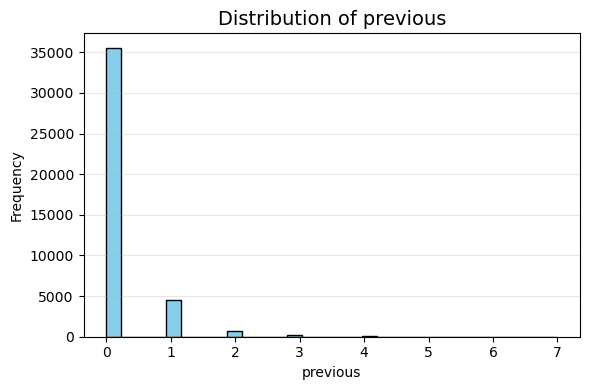

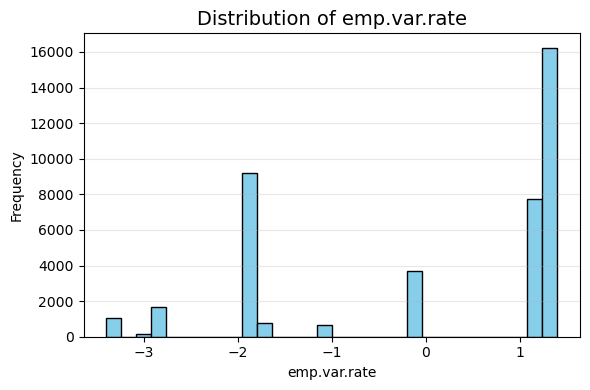

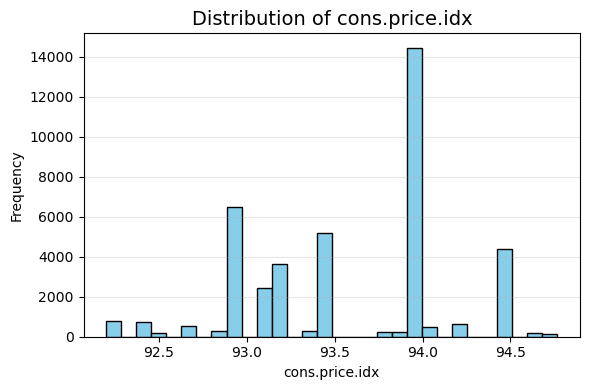

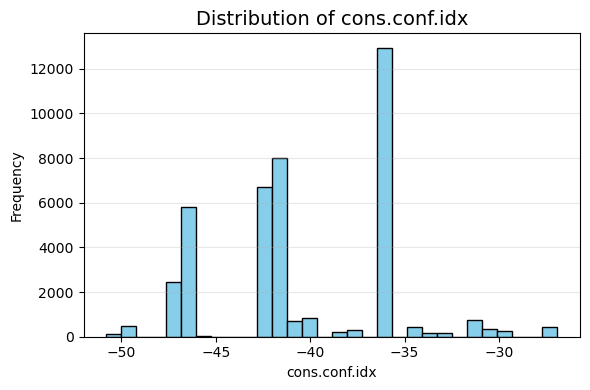

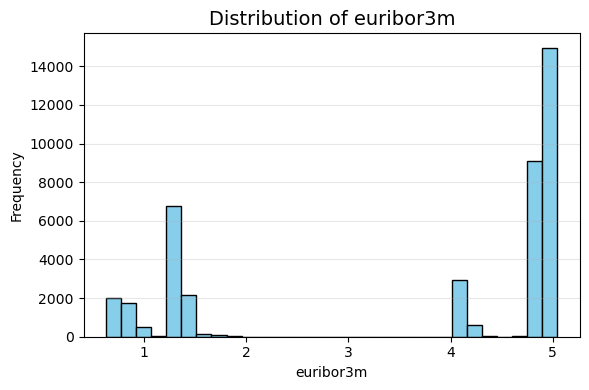

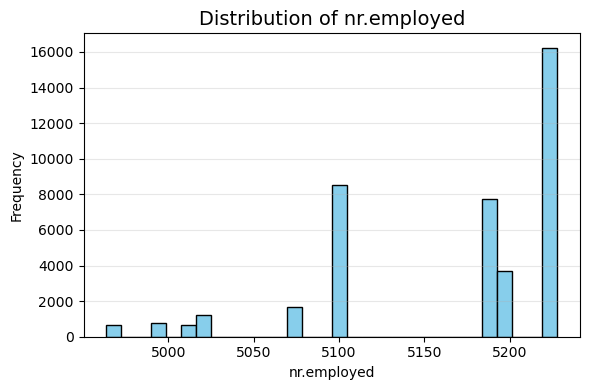

In [11]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(dataset[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    #plt.savefig(f'visualizations/{col}_distribution.png')
    plt.show()

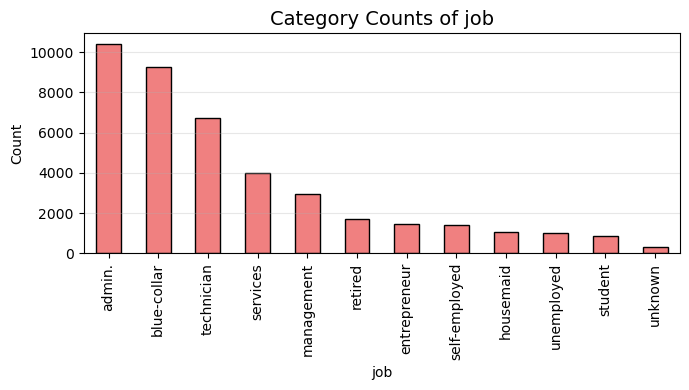

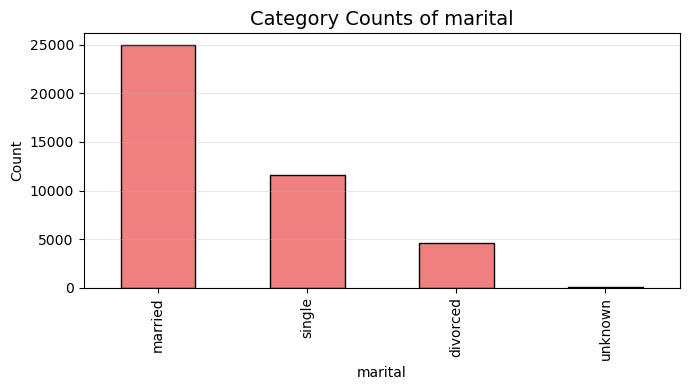

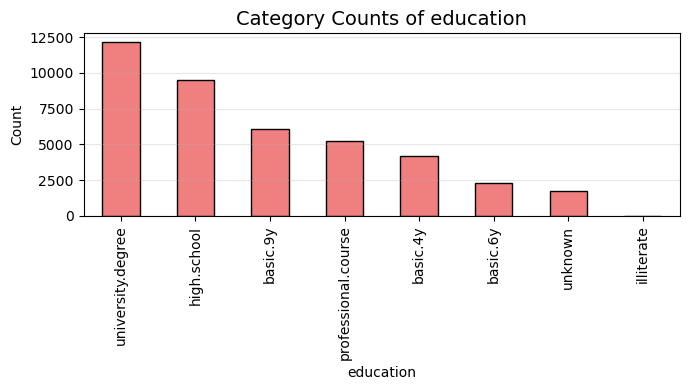

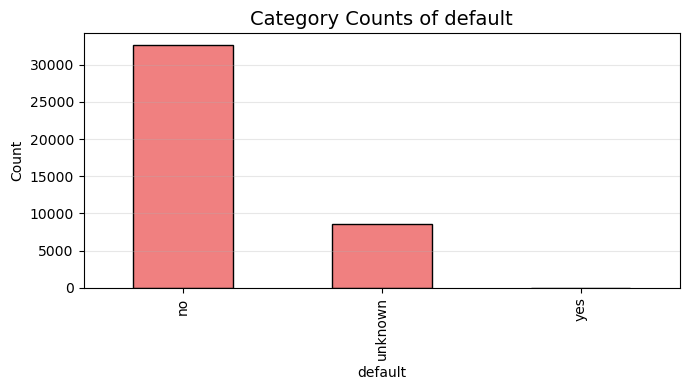

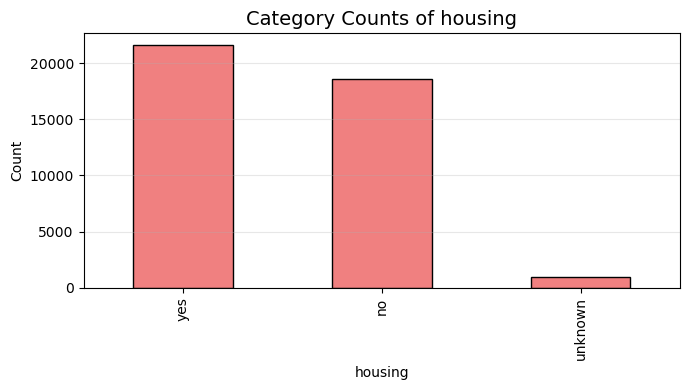

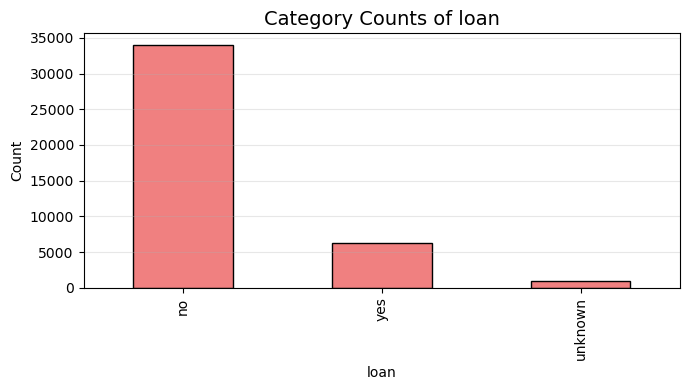

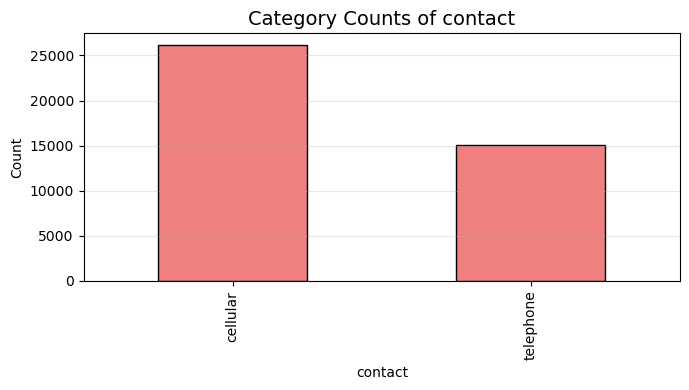

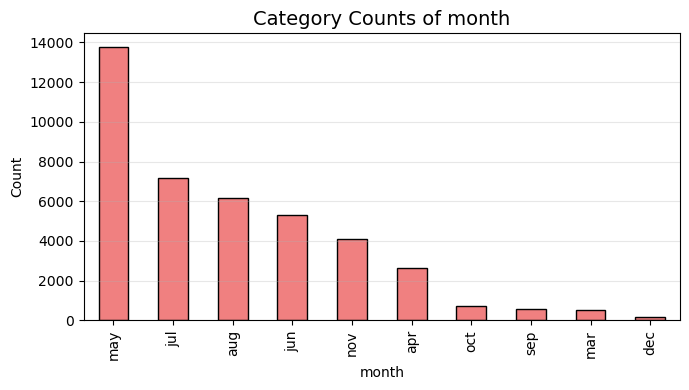

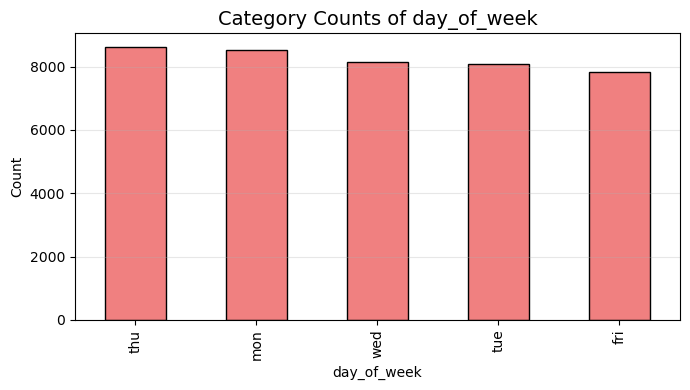

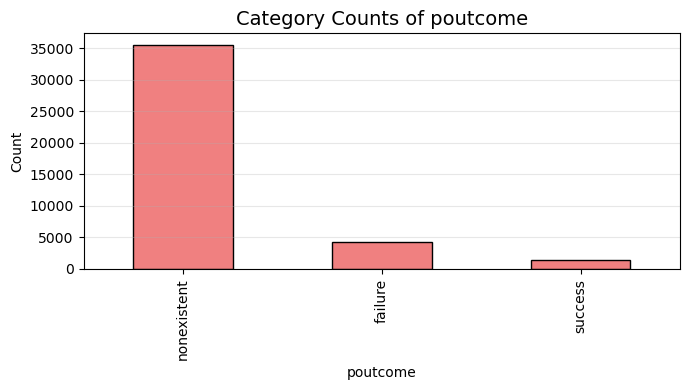

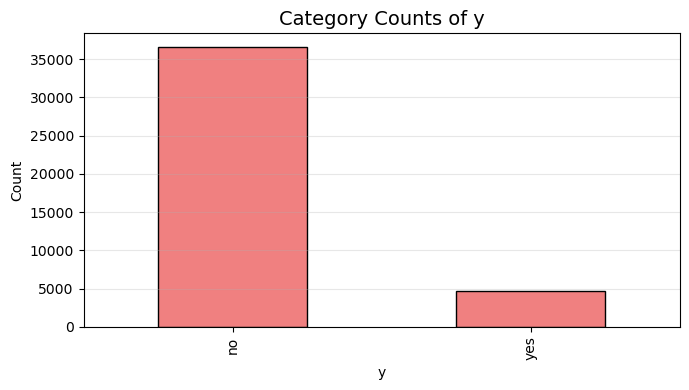

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    dataset[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f'Category Counts of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    #plt.savefig(f'visualizations/{col}_barplot.png')
    plt.show()


In [13]:
target_col = 'y'

# Count of each class
class_counts = dataset[target_col].value_counts()
class_percent = dataset[target_col].value_counts(normalize=True) * 100

# Combine counts and percentages for easy reference
target_summary = pd.DataFrame({
    'Count': class_counts,
    'Percentage (%)': class_percent.round(2)
})

print("🔹 Target Variable Distribution:")
print(target_summary)
print()

# Calculate imbalance ratio (majority/minority)
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"⚖️ Imbalance Ratio: {imbalance_ratio:.2f} (majority/minority)")

🔹 Target Variable Distribution:
     Count  Percentage (%)
y                         
no   36548           88.73
yes   4640           11.27

⚖️ Imbalance Ratio: 7.88 (majority/minority)


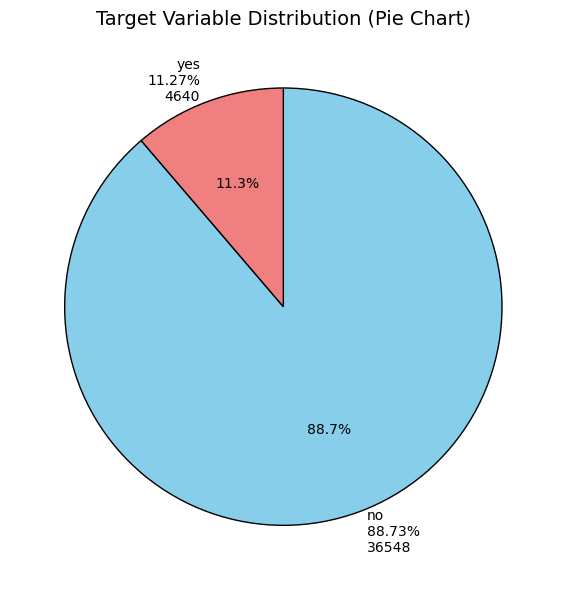

In [14]:
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=[f"{label}\n{pct:.2f}%\n{count}" for label, pct, count in zip(class_counts.index, class_percent, class_counts)],
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Target Variable Distribution (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.savefig(f'visualizations/Target Variable Distribution.png')
plt.show()

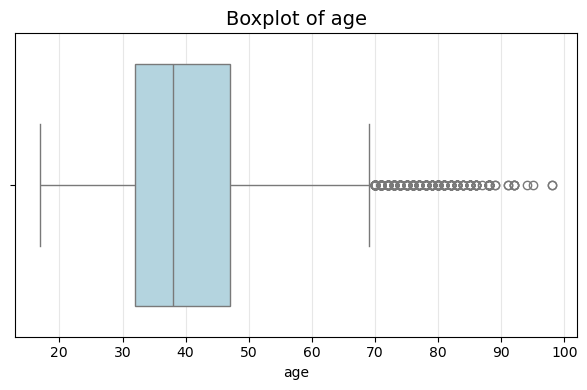

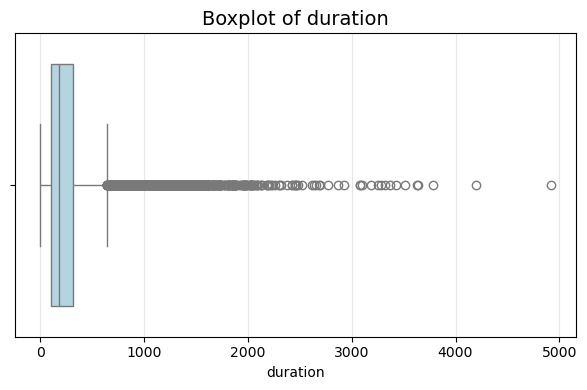

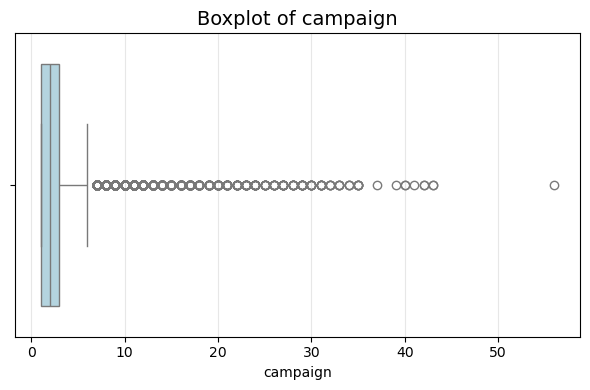

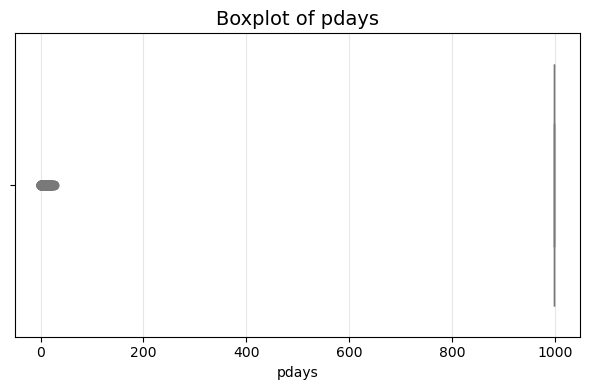

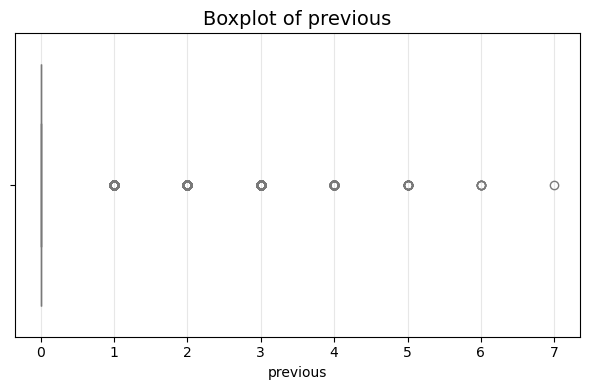

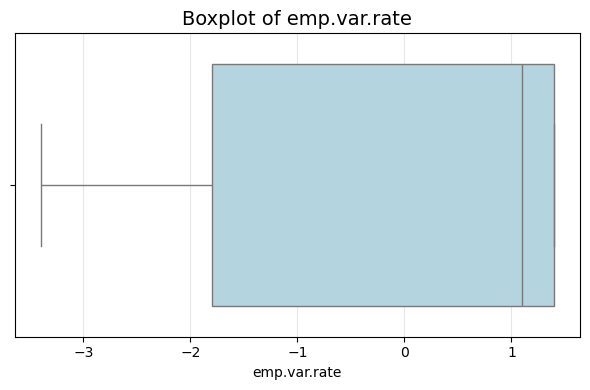

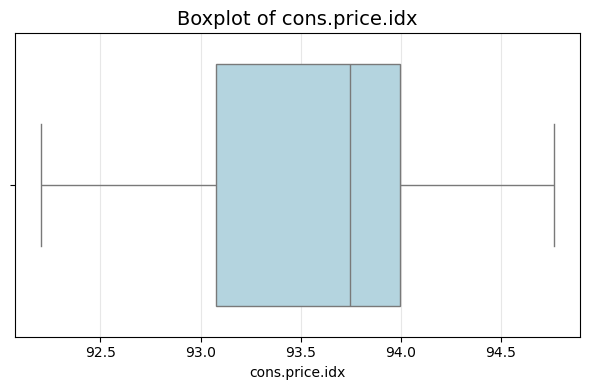

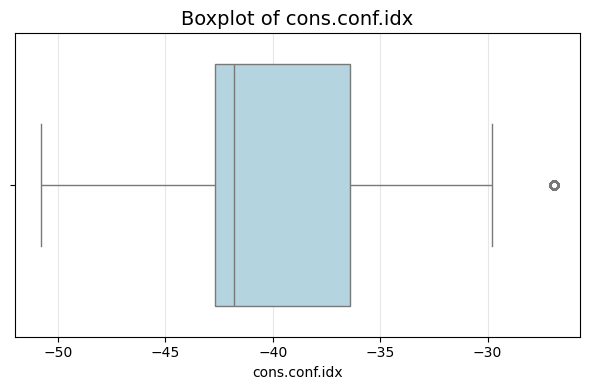

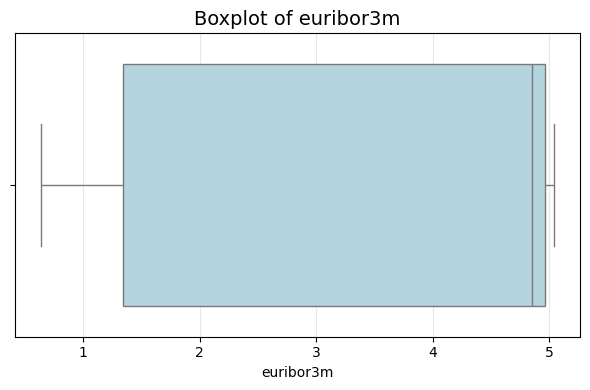

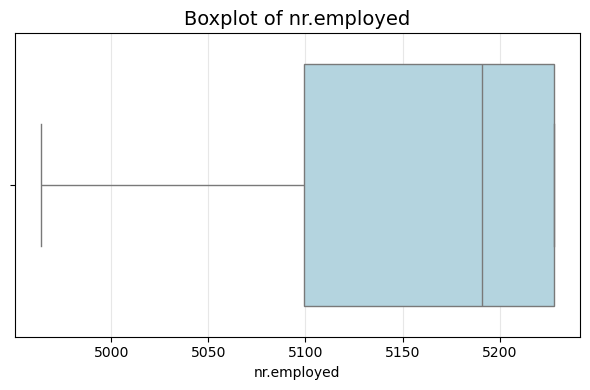

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset[col], color='lightblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'visualizations/Boxplot of {col}.png')
    plt.show()


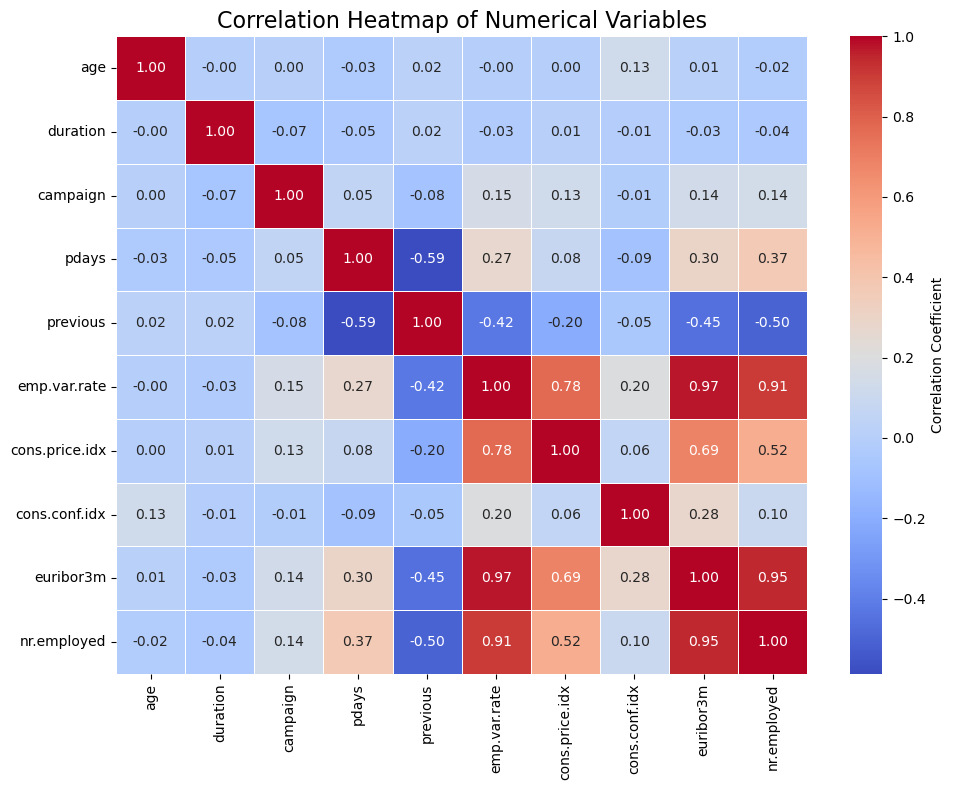

In [16]:
# Correlation matrix
corr_matrix = dataset[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.savefig(f'visualizations/correlation_matrix.png')
plt.show()
